## Imports

In [97]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/301.2 kB 640.0 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/301.2 kB 487.6 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.2 kB 655.4 kB/s eta 0:00:01
   ------------------------------- -------- 235.5/301.2 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 1.5 MB/s eta 0:00:00


In [49]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer


## Read in data

In [5]:
df = pd.read_csv("final_perfume_data.csv", encoding='unicode_escape')

In [6]:
df.head()

,Name,Brand,Description,Notes,Image URL
0,Tihota Eau de Parfum,Indult,"Rapa Nui for sugar, Tihota is, quite simply, ...","Vanilla bean, musks",https://static.luckyscent.com/images/products/...
1,Sola Parfum,Di Ser,A tribute to the expanse of space extending f...,"Lavender, Yuzu, Lemongrass, Magnolia, Geraniu...",https://static.luckyscent.com/images/products/...
2,Kagiroi Parfum,Di Ser,An aromatic ode to the ancient beauty of Japa...,"Green yuzu, green shikuwasa, sansho seed, cor...",https://static.luckyscent.com/images/products/...
3,Velvet Fantasy Eau de Parfum,Montale,Velvet Fantasy is a solar fragrance where cit...,"tangerine, pink pepper, black coffee, leat...",https://static.luckyscent.com/images/products/...
4,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,"Bergamot, almond, violet, jasmine, leather, s...",https://static.luckyscent.com/images/products/...


In [7]:
df.dtypes

Name           object
Brand          object
Description    object
Notes          object
Image URL      object
dtype: object

In [12]:
df.columns

Index(['Name', 'Brand', 'Description', 'Notes', 'Image URL'], dtype='object')

In [14]:
df.shape

(2191, 5)

In [16]:
df = df.drop(columns="Image URL")

In [18]:
df.columns

Index(['Name', 'Brand', 'Description', 'Notes'], dtype='object')

## Pre-processing

In [21]:
df.isna().sum()

Name            0
Brand           0
Description     0
Notes          80
dtype: int64

In [23]:
## keeping the og df just in case!
df_drop = df.dropna

In [25]:
## trying out how to seperate the notes!! :D
## i referenced code from the anime demo, please feel free to change this to something better! - sky
## changing it to a commma with a space after adds more scents, but it adds one like "your guess is as good as ours." lol
## some scents are definitely missing with this!!!
df_enc = df.join(pd.concat([df['Notes'].str.get_dummies(sep=',')])).drop('Notes',axis=1)

In [26]:
df_enc.shape

(2191, 4005)

In [27]:
df_enc.head()

,Name,Brand,Description,,Amber and Canadian Fir Balsam,Caramel,Clary Sage,Ethiopian Myrrh,Geranium Flower,Guaiac Wood,...,jasmine,lemony,lily,ocean,oolong,red berries,sage,spiced plums,tobacco,vanilla
0,Tihota Eau de Parfum,Indult,"Rapa Nui for sugar, Tihota is, quite simply, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Sola Parfum,Di Ser,A tribute to the expanse of space extending f...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Kagiroi Parfum,Di Ser,An aromatic ode to the ancient beauty of Japa...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Velvet Fantasy Eau de Parfum,Montale,Velvet Fantasy is a solar fragrance where cit...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Visualizations

In [29]:
note_melt = pd.melt(df_enc, id_vars=None,
     value_vars=['   Amber and Canadian Fir Balsam',
       '   Caramel', '   Clary Sage', '   Ethiopian Myrrh',
       '   Geranium Flower', '   Guaiac Wood',
       'jasmine', 'lemony', 'lily', 'ocean', 'oolong', 'red berries', 'sage',
       'spiced plums', 'tobacco', 'vanilla'],
     var_name='Notes', value_name='Scent')

Text(0.5, 1.0, 'Ratio of Notes')

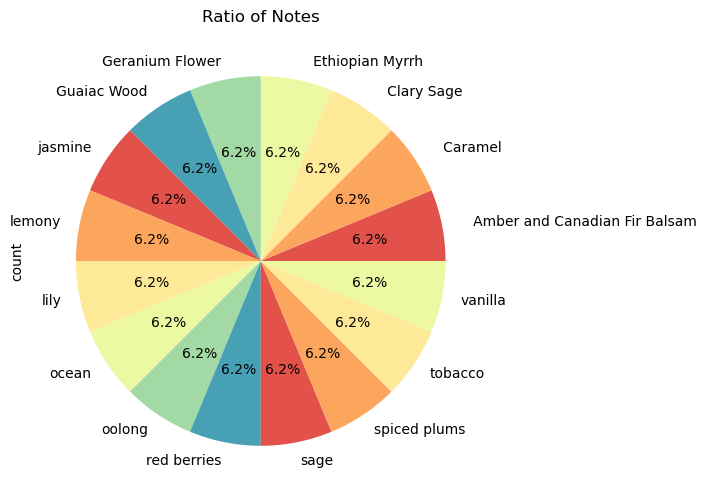

In [53]:
## pie chart of notes to start
plt.figure(figsize=(10,6))
note_melt['Notes'].value_counts().plot.pie(autopct='%1.1f%%', startangle=0, colors=sns.color_palette("Spectral"))
plt.title('Ratio of Notes')

In [61]:
df_enc.head()

,Name,Brand,Description,,Amber and Canadian Fir Balsam,Caramel,Clary Sage,Ethiopian Myrrh,Geranium Flower,Guaiac Wood,...,jasmine,lemony,lily,ocean,oolong,red berries,sage,spiced plums,tobacco,vanilla
0,Tihota Eau de Parfum,Indult,"Rapa Nui for sugar, Tihota is, quite simply, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Sola Parfum,Di Ser,A tribute to the expanse of space extending f...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Kagiroi Parfum,Di Ser,An aromatic ode to the ancient beauty of Japa...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Velvet Fantasy Eau de Parfum,Montale,Velvet Fantasy is a solar fragrance where cit...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


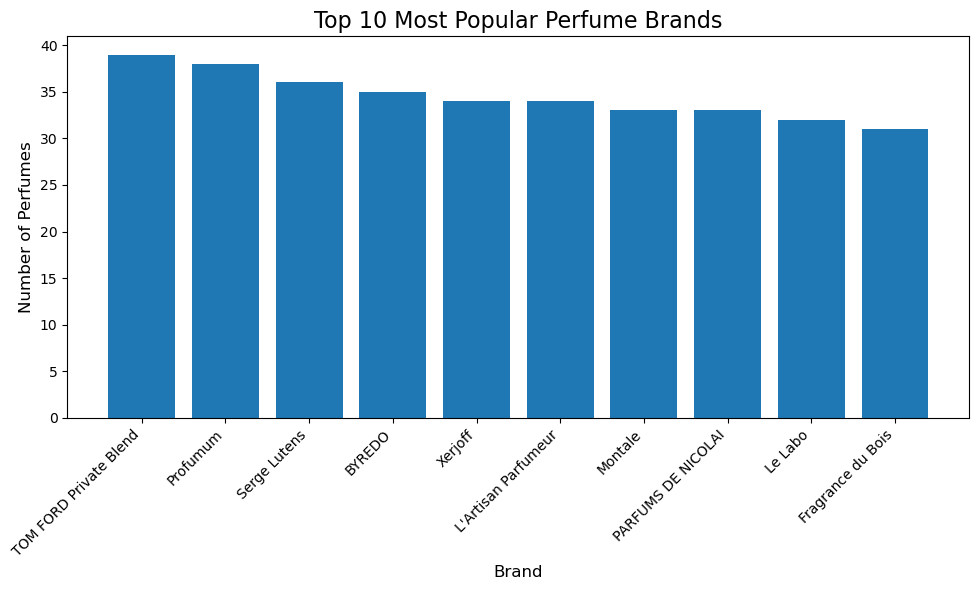

In [67]:
import matplotlib.pyplot as plt

# Count the occurrences of each brand
brand_counts = df['Brand'].value_counts().head(10)  # Top 10 most frequent brands

# Plot a bar chart of the most popular brands
plt.figure(figsize=(10, 6))
plt.bar(brand_counts.index, brand_counts.values)
plt.title('Top 10 Most Popular Perfume Brands', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Number of Perfumes', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [63]:
#### Build word cloud for the Notes feature

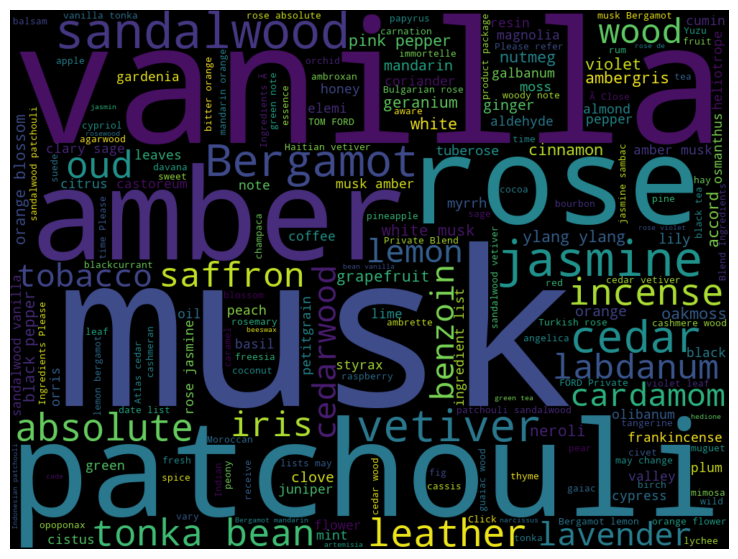

In [71]:
notes = " ".join(df['Notes'].dropna().astype(str).values)  
wc = WordCloud(
    background_color='black',
    stopwords=STOPWORDS,
    height=750,
    width=1000
)

word_cloud = wc.generate(notes)
plt.figure(figsize=(10, 7))  # Adjust figure size for better visualization
plt.imshow(word_cloud, interpolation='bilinear')  # Better rendering
plt.axis("off")  # Turn off axis for cleaner display
plt.show()

In [37]:
# Combine 'Description' and 'Notes' columns for feature extraction

In [73]:
df['Combined_Features'] = df['Description'].fillna('') + ' ' + df['Notes'].fillna('')

In [75]:
df['Combined_Features'].head()

0     Rapa Nui for sugar, Tihota is, quite simply, ...
1     A tribute to the expanse of space extending f...
2     An aromatic ode to the ancient beauty of Japa...
3     Velvet Fantasy is a solar fragrance where cit...
4     There's no way A Lab On Fire could relocate t...
Name: Combined_Features, dtype: object

In [89]:
# Initialize a Count Vectorizer
count_vectorizer = CountVectorizer(stop_words='english')

In [91]:
#Convert combined features text into numerical values
count_matrix = count_vectorizer.fit_transform(df['Combined_Features'])

In [93]:
# Compute cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)

#### Function definition
##### perfume_name: Name of the perfume for which recommendations are requested
##### num_recommendations: Number of recommendations to return (default: 5)

In [ ]:
# Recommendation Function
def recommend_perfumes(perfume_name, num_recommendations=5):
    try:
        # Get the given perfume name's index
        # Filters the DataFrame to find rows where the name column contains the function input
        # Uses case=False to make the search case-insensitive.
        # Get the first match by using .index[0] 
        perfume_idx = df[df['Name'].str.contains(perfume_name, case=False, na=False)].index[0]
        
    except IndexError:
        # Index error raised if theres no name matches found
        return f"No perfume found with the name '{perfume_name}'."
    
    # Accesses the row in the cosine similarity matrix corresponding to the input perfume (perfume_idx).
    # list(enumerate(...)) pairs each score with its index
    #  Structure of sim_scores:
    #      Each element is a tuple:
    #         The first value is the index of the resulting perfume.
    #         The second value is the similarity score with the perfume entered
    sim_scores = list(enumerate(cosine_sim[perfume_idx]))
    
    # Sorts perfumes based on similarity scores in descending order
    # Ensures the most similar perfumes appear first.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the indices of the most similar perfumes
    # Extracts the indices of the top num_recommendations most similar perfumes.
    # sim_scores[1:num_recommendations + 1] skips the first score because it corresponds to the input perfume itself (similarity score = 1.0).
    recommended_indices = [i[0] for i in sim_scores[1:num_recommendations + 1]]
    
    # Uses the indices of the recommended perfumes (recommended_indices) to retrieve their details (Name and Brand) from the DataFrame.
    return df.iloc[recommended_indices][['Name', 'Brand']]


In [110]:
# Test the recommender system
recommendations = recommend_perfumes('Tihota', num_recommendations=5)
print(recommendations)

                                              Name  \
2083                  Vanille Absolu Eau de Parfum   
1481                   Vanilla Flash Eau de Parfum   
2134                   Vanille Tonka Eau de Parfum   
564                              Sucre Noir Parfum   
261   Vaniglia del Madagascar Parfum Concentration   

                                 Brand  
2083                           Montale  
1481                        Tauerville  
2134                PARFUMS DE NICOLAI  
564                       Arte Profumi  
261   Farmacia SS. Annunziata dal 1561  
